In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 필요모듈 import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [ ]:
# pandas read_csv 메소드 호출 후 train.csv 파일 읽어옴. dataframe 형태로 반환
train = pd.read_csv('/content/drive/MyDrive/train.csv')

## visualization

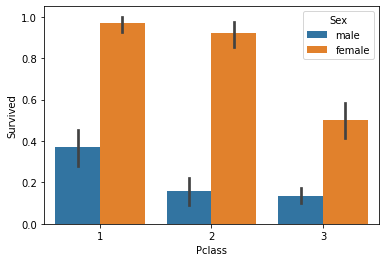

In [ ]:
sns.barplot(x ='Pclass', y ='Survived', hue ='Sex', data = train)

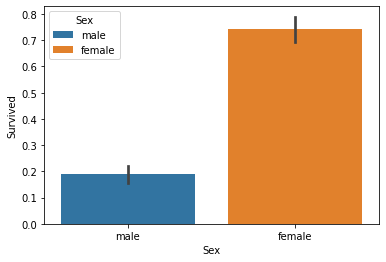

In [ ]:
# sex의 survived 데이터 분포 확인
sns.barplot( x = train['Sex'], y = train['Survived'], hue = train['Sex'],dodge = False) 

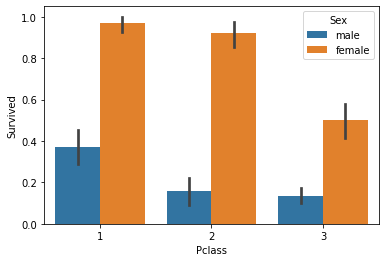

In [ ]:
# pclass별 sex의 survived 데이터 분포 
sns.barplot(x = 'Pclass', y = 'Survived', hue ='Sex', data = train)

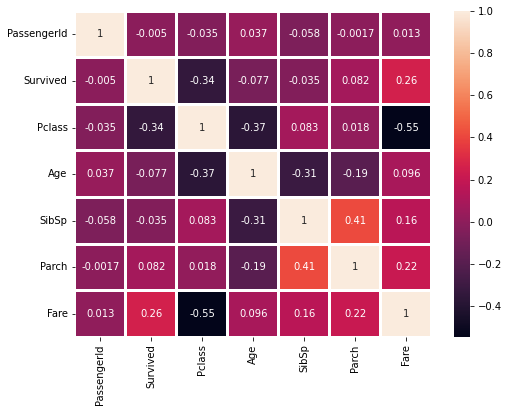

In [ ]:
# 전체 변수 corrlelation
plt.subplots(figsize = (8,6))
sns.heatmap(train.corr(), annot = True, linewidth = 2)

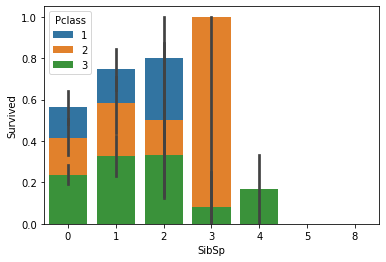

In [ ]:
# sibsp별 + pclass별 survived
sns.barplot(x = 'SibSp', y = 'Survived', hue = 'Pclass', data = train, dodge = False)

## modelling

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 해당 컬럼 drop
train = train.drop(['Name','Ticket','SibSp','Parch','Cabin'], axis = 1)

In [ ]:
# 모델링 사용할 변수 숫자로 변환 
train['Sex'].dtypes
train['Sex'] = train['Sex'].astype(str)

label = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train[col] = label.fit_transform(train[col])

In [ ]:
# X_train, Y_train 학습시킬 변수와 Label 변수 분리
X_train = train[['PassengerId','Pclass','Sex','Age','Fare','Fare','Embarked']]
Y_train = train[['Survived']]

In [ ]:
# corr()['컬럼명'] 호출 → 다른 컬럼들 간의 상관관계 리턴
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.077221
Fare           0.257307
Embarked      -0.163517
Name: Survived, dtype: float64

## Logistic Regression

In [ ]:
# LogisticRegression 객체 생성
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [8]:
test = pd.read_csv('../content/drive/MyDrive/test (1).csv')

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [11]:
test = test.drop(['Age', 'PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Cabin', 'Embarked'], axis=1)